# <p style="background-color:; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Stellar Object Classification</p>

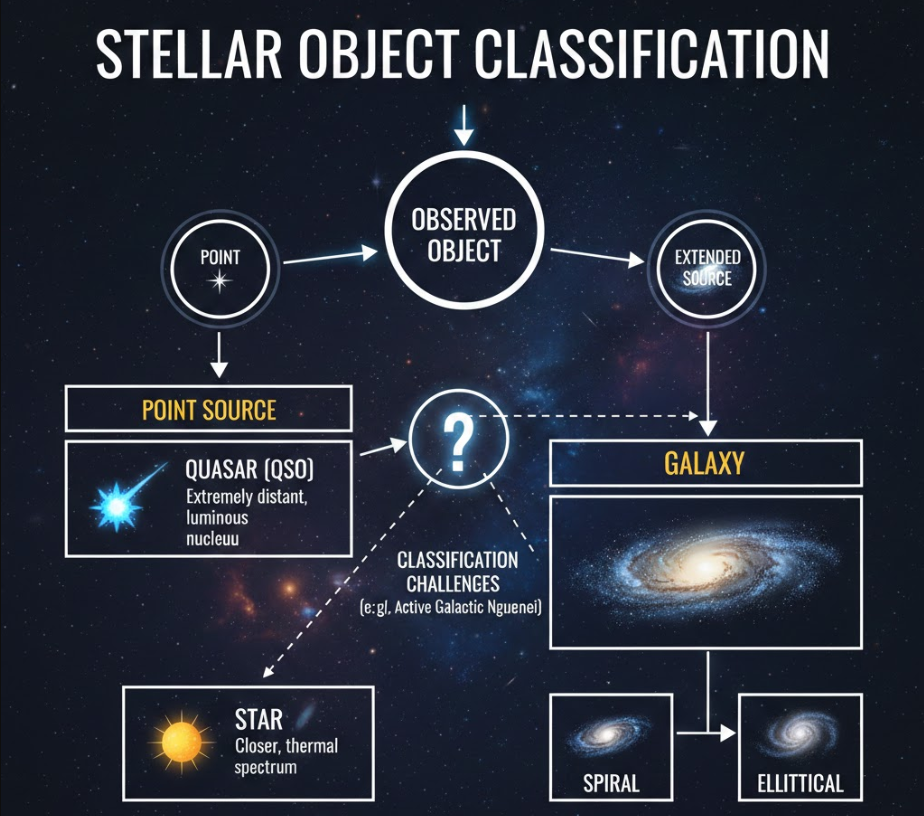



<h3 align="left"><font color=red>Problem:</font></h3>
This project aims to develop machine learning models to classify celestial objects into stars, galaxies, and quasars. This project aims to faciltate efficient automated classification, insights into distinguishing features, and optimized data processing for large-scale surveys through the predictive models, data visualizations, and a comparative analysis of various algorithms.



<h3 align="left"><font color=red>Objectives:</font></h3>

* __Explore the Dataset__: Dataset Focus, Key Features, Target Variable

* __Conduct Extensive Exploratory Data Analysis (EDA)__: Dive deep into bivariate relationships against the target.

* __Preprocessing Steps__:
  - Remove irrelevant features
  - Address missing values
  - Treat outliers
  - Encode categorical variables
  - Transform skewed features to achieve normal-like distributions

* __Model Building__:
  - Establish pipelines for models that require scaling
  - Implement and tune classification models including Logistic Regression, SVM, Decision Trees, and Random Forest
  - Emphasize achieving high recall for class 1, ensuring comprehensive identification of heart patients

* __Evaluate and Compare Model Performance__: Utilize precision, recall, and F1-score to gauge models' effectiveness.


<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: ; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Univariate Analysis](#univariate)
        - [Step 4.1.1 | Numerical Variables Univariate Analysis](#num_uni)
        - [Step 4.1.2 | Categorical Variables Univariate Analysis](#cat_uni)
        - [Step 4.1.3 | Numerical Features vs Target](#num_target)
        - [Step 4.1.4 | Categorical Features vs Target](#cat_target)
* [Step 5 | Data Preprocessing](#preprocessing)
    - [Step 5.1 | Irrelevant Features Removal](#feature_removal)
    - [Step 5.2 | Missing Value Treatment](#missing)
    - [Step 5.3 | Feature Scaling](#scaling)
    - [Step 5.4 | Categorical Features Encoding](#encoding)
    - [Step 5.5 | Outlier Treatment](#outlier)
    - [Step 5.6 |  Univariate Analysis](#univariate)
    - [Step 5.7 |  Bivariate Analysis](#bivariate)
    - [Step 5.6 | Splitting the Dataset ](#splitting)
* [Step 6 | Decision Tree Model Building](#dt)
    - [Step 6.1 | DT Base Model Definition](#dt_base)
    - [Step 6.2 | DT Model Evaluation](#dt_eval)
* [Step 7 | Random Forest Model Building](#rf)
    - [Step 7.1 | RF Base Model Definition](#rf_base)
    - [Step 7.2 | RF Model Evaluation](#rf_eval)
* [Step 8 | KNN Model Building](#knn)
    - [Step 8.1 | KNN Base Model Definition](#knn_base)
    - [Step 8.2 | KNN Evaluation](#knn_eval)
* [Step 9 | SVM Model Building](#svm)
    - [Step 9.1 | SVM Base Model Definition](#svm_base)
    - [Step 9.2 | SVM Model Evaluation](#svm_eval)
* [Step 10 | Gradient Boosting Model Building](#gb)
    - [Step 10.1 | Gradient Boosting Base Model Definition](#gb_base)
    - [Step 10.2 | Gradient Boosting Model Evaluation](#gb_eval)
* [Step 11 | Decision Tree Model Building](#dt)
    - [Step 11.1 | Decision Tree Base Model Definition](#dt_base)
    - [Step 11.2 | Descision Tree Model Evaluation](#dt_eval)
* [Step 12 | XGBoost Model Building](#xgb)
    - [Step 12.1 | XGBoost Base Model Definition](#xgb_base)
    - [Step 12.2 | XGBoost Model Evaluation](#xgb_eval)
* [Step 13 | Model Comparision](#comparision)

<a id="read"></a>
# <p style="background-color: ; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

⬆️ [Table of Contents](#contents_tabel)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

import xgboost as xgb
import joblib

import warnings
warnings.filterwarnings('ignore')

<a id="read"></a>
# <p style="background-color: ; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: ; font-size:115%; text-align:left">

First of all, let's load the dataset:

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/star_classification.csv')

In [ ]:
data.describe().T

count          mean           std           min           25%  \
obj_ID       100000.0  1.237665e+18  8.438560e+12  1.237646e+18  1.237659e+18   
alpha        100000.0  1.776291e+02  9.650224e+01  5.527828e-03  1.275182e+02   
delta        100000.0  2.413530e+01  1.964467e+01 -1.878533e+01  5.146771e+00   
u            100000.0  2.198047e+01  3.176929e+01 -9.999000e+03  2.035235e+01   
g            100000.0  2.053139e+01  3.175029e+01 -9.999000e+03  1.896523e+01   
r            100000.0  1.964576e+01  1.854760e+00  9.822070e+00  1.813583e+01   
i            100000.0  1.908485e+01  1.757895e+00  9.469903e+00  1.773228e+01   
z            100000.0  1.866881e+01  3.172815e+01 -9.999000e+03  1.746068e+01   
run_ID       100000.0  4.481366e+03  1.964765e+03  1.090000e+02  3.187000e+03   
rerun_ID     100000.0  3.010000e+02  0.000000e+00  3.010000e+02  3.010000e+02   
cam_col      100000.0  3.511610e+00  1.586912e+00  1.000000e+00  2.000000e+00   
field_ID     100000.0  1.861305e+02  1.490111e+02  1.100000e+01  8.200000e+01   
spec_obj_ID  100000.0  5.783882e+18  3.324016e+18  2.995191e+17  2.844138e+18   
redshift     100000.0  5.766608e-01  7.307073e-01 -9.970667e-03  5.451684e-02   
plate        100000.0  5.137010e+03  2.952303e+03  2.660000e+02  2.526000e+03   
MJD          100000.0  5.558865e+04  1.808484e+03  5.160800e+04  5.423400e+04   
fiber_ID     100000.0  4.493127e+02  2.724984e+02  1.000000e+00  2.210000e+02   

                      50%           75%           max  
obj_ID       1.237663e+18  1.237668e+18  1.237681e+18  
alpha        1.809007e+02  2.338950e+02  3.599998e+02  
delta        2.364592e+01  3.990155e+01  8.300052e+01  
u            2.217914e+01  2.368744e+01  3.278139e+01  
g            2.109983e+01  2.212377e+01  3.160224e+01  
r            2.012529e+01  2.104478e+01  2.957186e+01  
i            1.940514e+01  2.039650e+01  3.214147e+01  
z            1.900460e+01  1.992112e+01  2.938374e+01  
run_ID       4.188000e+03  5.326000e+03  8.162000e+03  
rerun_ID     3.010000e+02  3.010000e+02  3.010000e+02  
cam_col      4.000000e+00  5.000000e+00  6.000000e+00  
field_ID     1.460000e+02  2.410000e+02  9.890000e+02  
spec_obj_ID  5.614883e+18  8.332144e+18  1.412694e+19  
redshift     4.241733e-01  7.041543e-01  7.011245e+00  
plate        4.987000e+03  7.400250e+03  1.254700e+04  
MJD          5.586850e+04  5.677700e+04  5.893200e+04  
fiber_ID     4.330000e+02  6.450000e+02  1.000000e+03



<h2 align="left"><font color=red>Dataset Description:</font></h2>

| **Variable** | **Description** |
| :--- | :--- |
| **u** | Brightness of the object in the **u (ultraviolet)** band (measured in magnitudes) |
| **g** | Brightness of the object in the **g (green)** band (magnitudes) |
| **r** | Brightness of the object in the **r (red)** band (magnitudes) |
| **i** | Brightness of the object in the **i (near-infrared)** band (magnitudes) |
| **z** | Brightness of the object in the **z (infrared)** band (magnitudes) |
| **redshift** | Amount by which the object’s light is **shifted toward red**; related to its distance and speed away from us |
| **class** | Final label / type of object (e.g. **STAR, GALAXY, QSO/QUASAR**) predicted by the model |


<a id="overview"></a>
# <p style="background-color:; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

⬆️ [Table of Contents](#contents_tabel)


    
Next, I'll delve into a detailed exploration of the dataset:

<a id="basic"></a>
# <b><span style='color: '>Step 3.1 |</span><span style='color:'> Dataset Basic Information</span></b>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

<a id="num_statistics"></a>
# <b><span style='color:'>Step 3.2 |</span><span style='color:'> Summary Statistics for Numerical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color:; font-size:115%; text-align:left">

Let's delve into the summary statistics for our __numerical__ attributes:

In [ ]:
star_data = data.drop(columns='class', axis= 1)
star_data.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   cam_col  redshift  plate    MJD  
0        2  0.634794   5812  56354  
1        5  0.779136  10445  58158  
2        2  0.644195   4576  55592  
3        3  0.932346   9149  58039  
4        3  0.116123   6121  56187

<a id="cat_statistics"></a>
# <b><span style='color:'>Step 3.3 |</span><span style='color:'> Summary Statistics for Categorical  Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color:; font-size:115%; text-align:left">

Afterward, let's look at the summary statistics of the categorical features:

In [ ]:
data.describe(include='object')

class
count   100000
unique       3
top     GALAXY
freq     59445

<a id="eda"></a>
# <p style="background-color:; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: ; font-size:115%; text-align:left">

For our __Exploratory Data Analysis (EDA)__, we'll take it in two main steps:

>__1. Univariate Analysis__: Here, we'll focus on one feature at a time to understand its distribution and range.
>
>__2. Bivariate Analysis__: In this step, we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: __predicting the target variable__.

<a id="univariate"></a>
# <b><span style='color:'>Step 4.1 |</span><span style='color:'> Univariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: ; font-size:115%; text-align:left">

We undertake univariate analysis on the dataset's features, based on their datatype:

* <b>For continuous features</b> such as <b>u, g, r, i, z</b> (brightness in different wavelength bands) and <b>redshift</b>:  
We use <b>histograms</b> to study how these values are distributed.  
This helps us understand the <b>brightness patterns</b> and <b>distance variations</b> of celestial objects like Stars, Galaxies, and Quasars.

    
* <b>For categorical features</b> such as <b>class</b> (e.g., STAR, GALAXY, QSO):  
We use <b>bar plots</b> to visualize the count of each object type.  
This lets us observe whether the dataset is balanced or dominated by a particular category.

By applying these visualization methods, we can better understand the <b>individual behavior</b> of each feature and how they contribute to identifying the correct type of celestial object.

<a id="num_uni"></a>
### <b><span style='color'>Step 4.1.1 |</span><span style='color:'> Numerical Variables Univariate Analysis</span></b>  

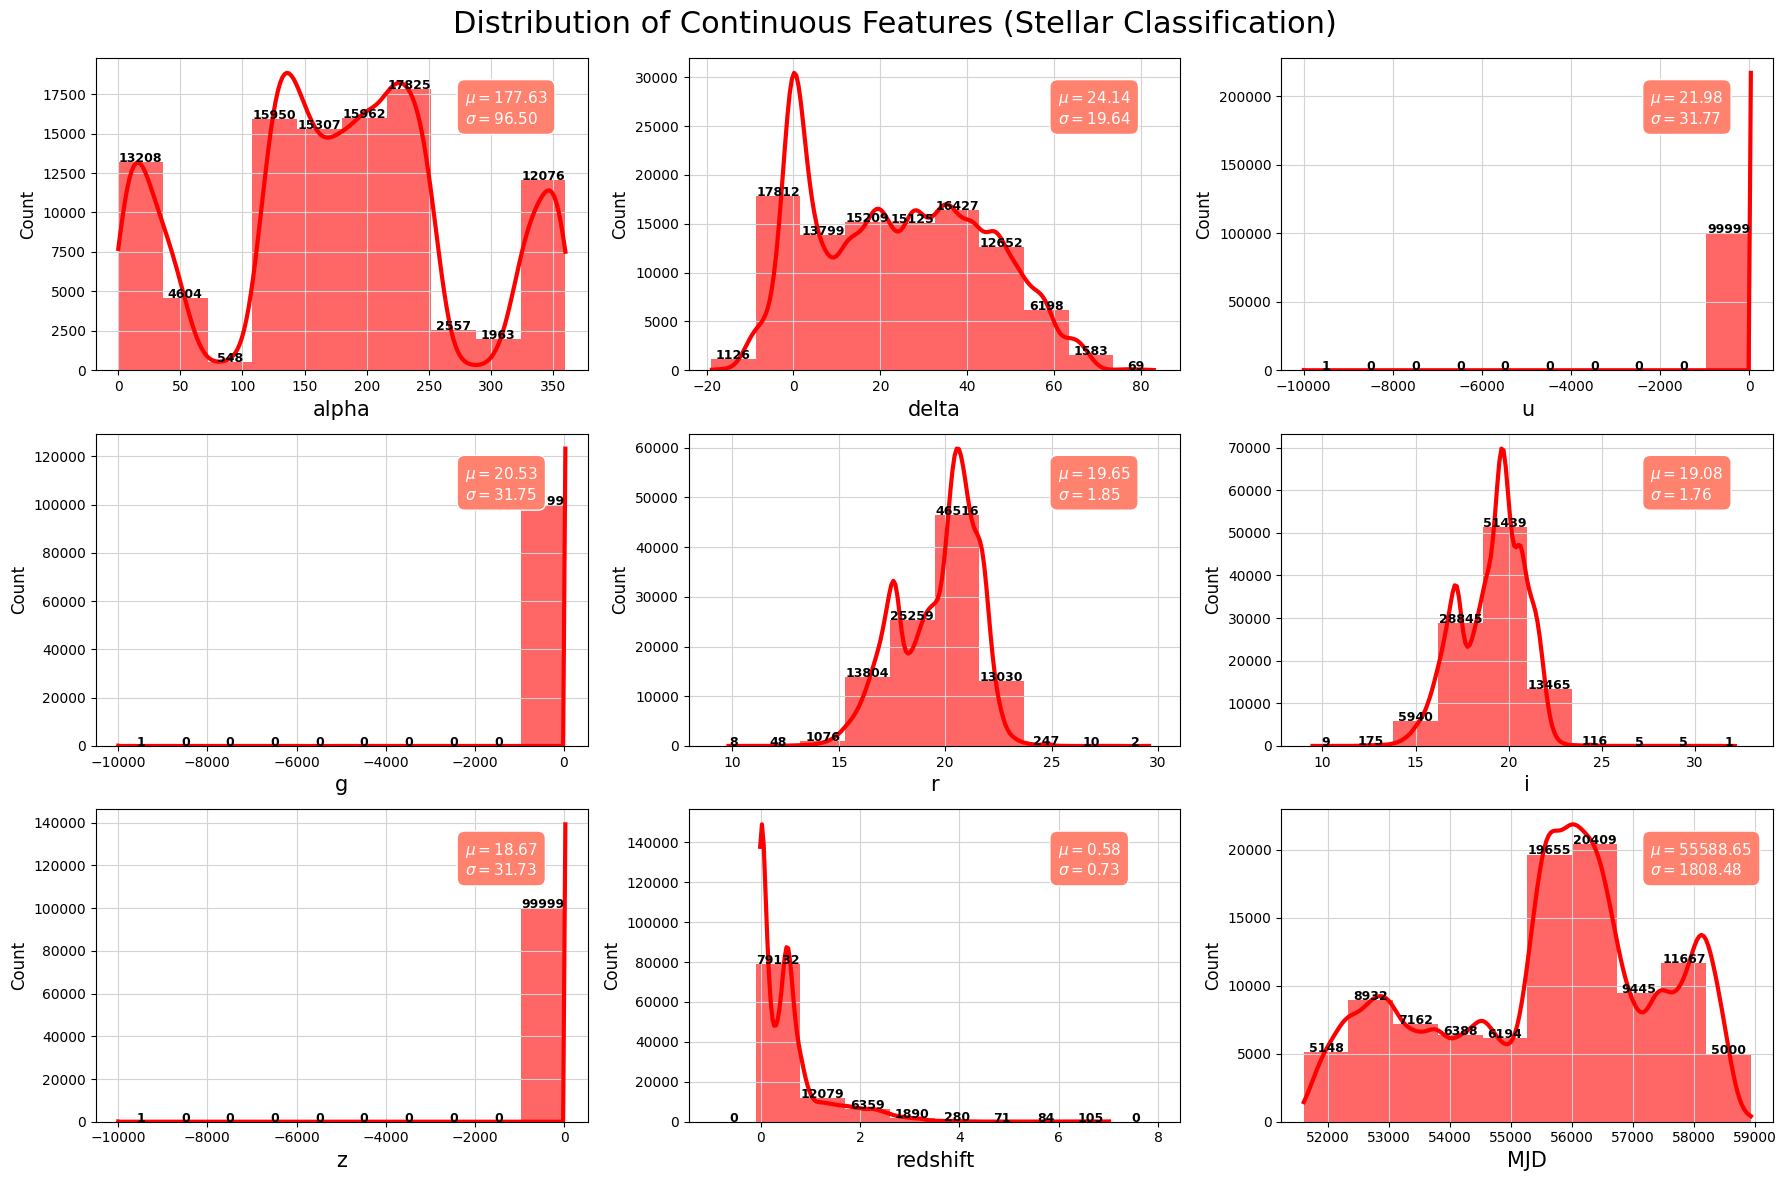

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous features for Stellar Classification
continuous_features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'MJD']

# Filter out continuous features for the univariate analysis
df_continuous = star_data[continuous_features]

# Set up the subplot: 3 rows x 3 columns (for 9 features)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3   # row index
    y = i % 3    # column index

    values, bin_edges = np.histogram(
        df_continuous[col],
        range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max()))
    )

    graph = sns.histplot(
        data=df_continuous,
        x=col,
        bins=bin_edges,
        kde=True,
        ax=ax[x, y],
        edgecolor='none',
        color='red',
        alpha=0.6,
        line_kws={'lw': 3}
    )

    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].grid(color='lightgrey')

    # Annotating bar heights
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate(
            int(p.get_height()),
            (p.get_x() + p.get_width() / 2, p.get_height() + 1),
            ha='center',
            fontsize=9,
            fontweight="bold"
        )

    # Mean + Std text box
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))

    ax[x, y].text(
        0.75, 0.9, textstr,
        transform=ax[x, y].transAxes,
        fontsize=11,
        verticalalignment='top',
        color='white',
        bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5)
    )

plt.suptitle('Distribution of Continuous Features (Stellar Classification)', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()


<a id="cat_uni"></a>
### <b><span style='color'>Step 4.1.2 |</span><span style='color:'> Categorical Variables Univariate Analysis</span></b>  

In [ ]:
categorical_features = ['cam_col', 'class']

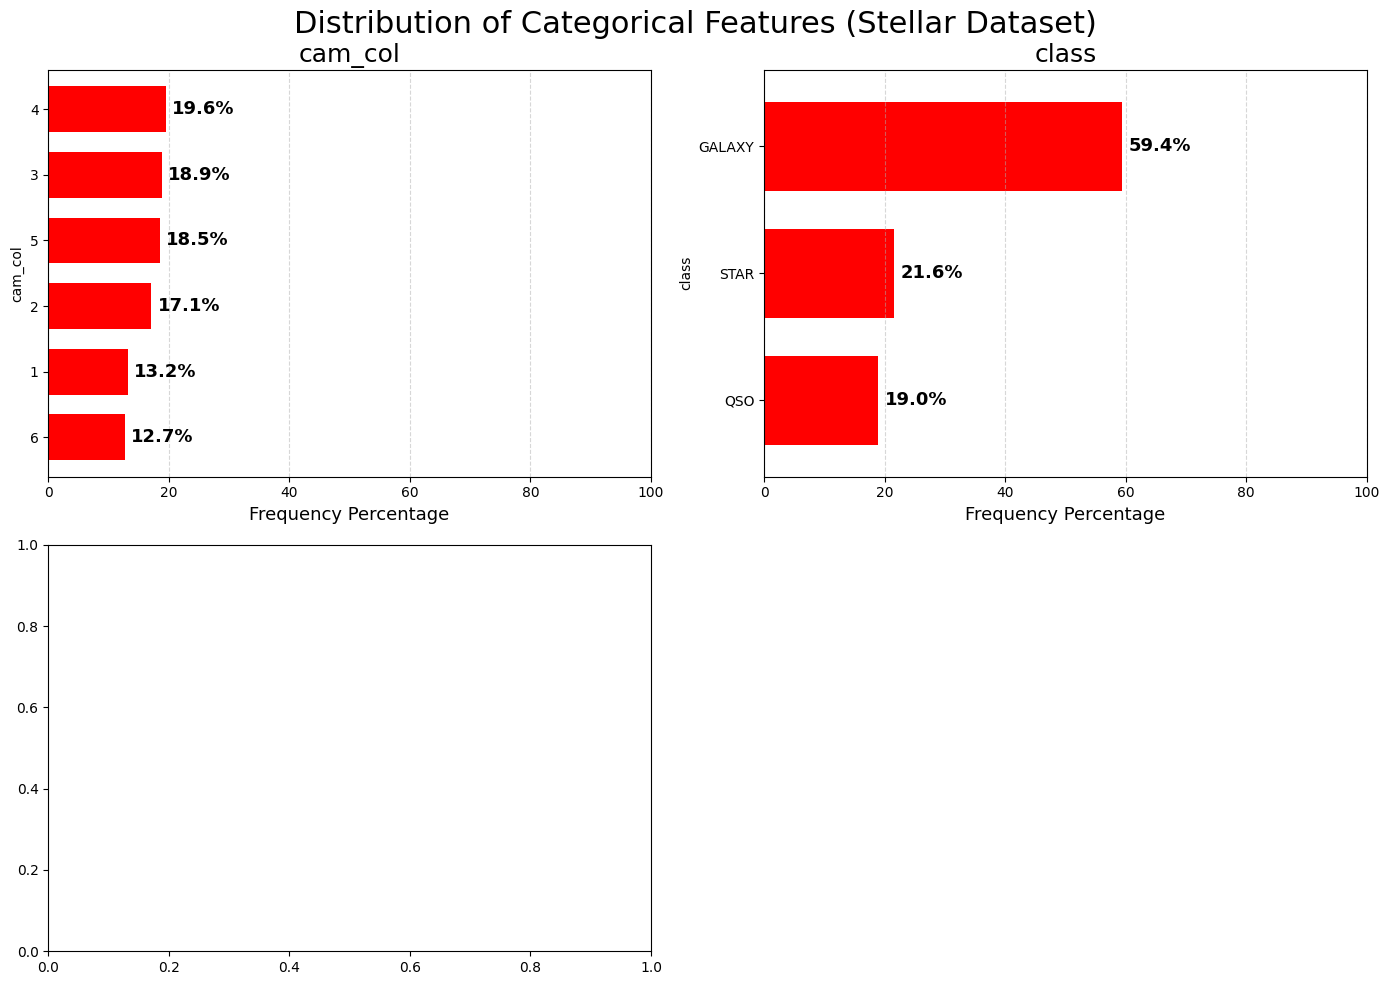

In [ ]:
import matplotlib.pyplot as plt

# Categorical features in Stellar dataset
categorical_features = ['cam_col', 'class']

# 2 rows x 2 columns (using 2 plots only)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Loop to plot bar charts for each categorical feature
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Calculate frequency percentages
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.7, color='red')

    # Add percentage annotations
    for idx, value in enumerate(value_counts):
        ax[row, col_idx].text(value + 1, idx, f'{round(value, 1)}%', fontsize=13, fontweight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 100])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=13)
    ax[row, col_idx].set_title(f'{col}', fontsize=18)
    ax[row, col_idx].grid(axis='x', linestyle='--', alpha=0.5)

# Remove empty subplots
ax[1,1].axis('off')

plt.suptitle('Distribution of Categorical Features (Stellar Dataset)', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


<a id="num_target"></a>
### <b><span style='color'>Step 4.1.3 |</span><span style='color:'> Numerical Features vs Target</span></b>  

<div style="border-radius:10px; padding: 15px; background-color: ; font-size:115%; text-align:left">
    
I am going to visualize each continuous feature against the target using two types of charts:

* __Bar plots__ - showing the mean values.
* __KDE plots__ - displaying the distribution for each target category.

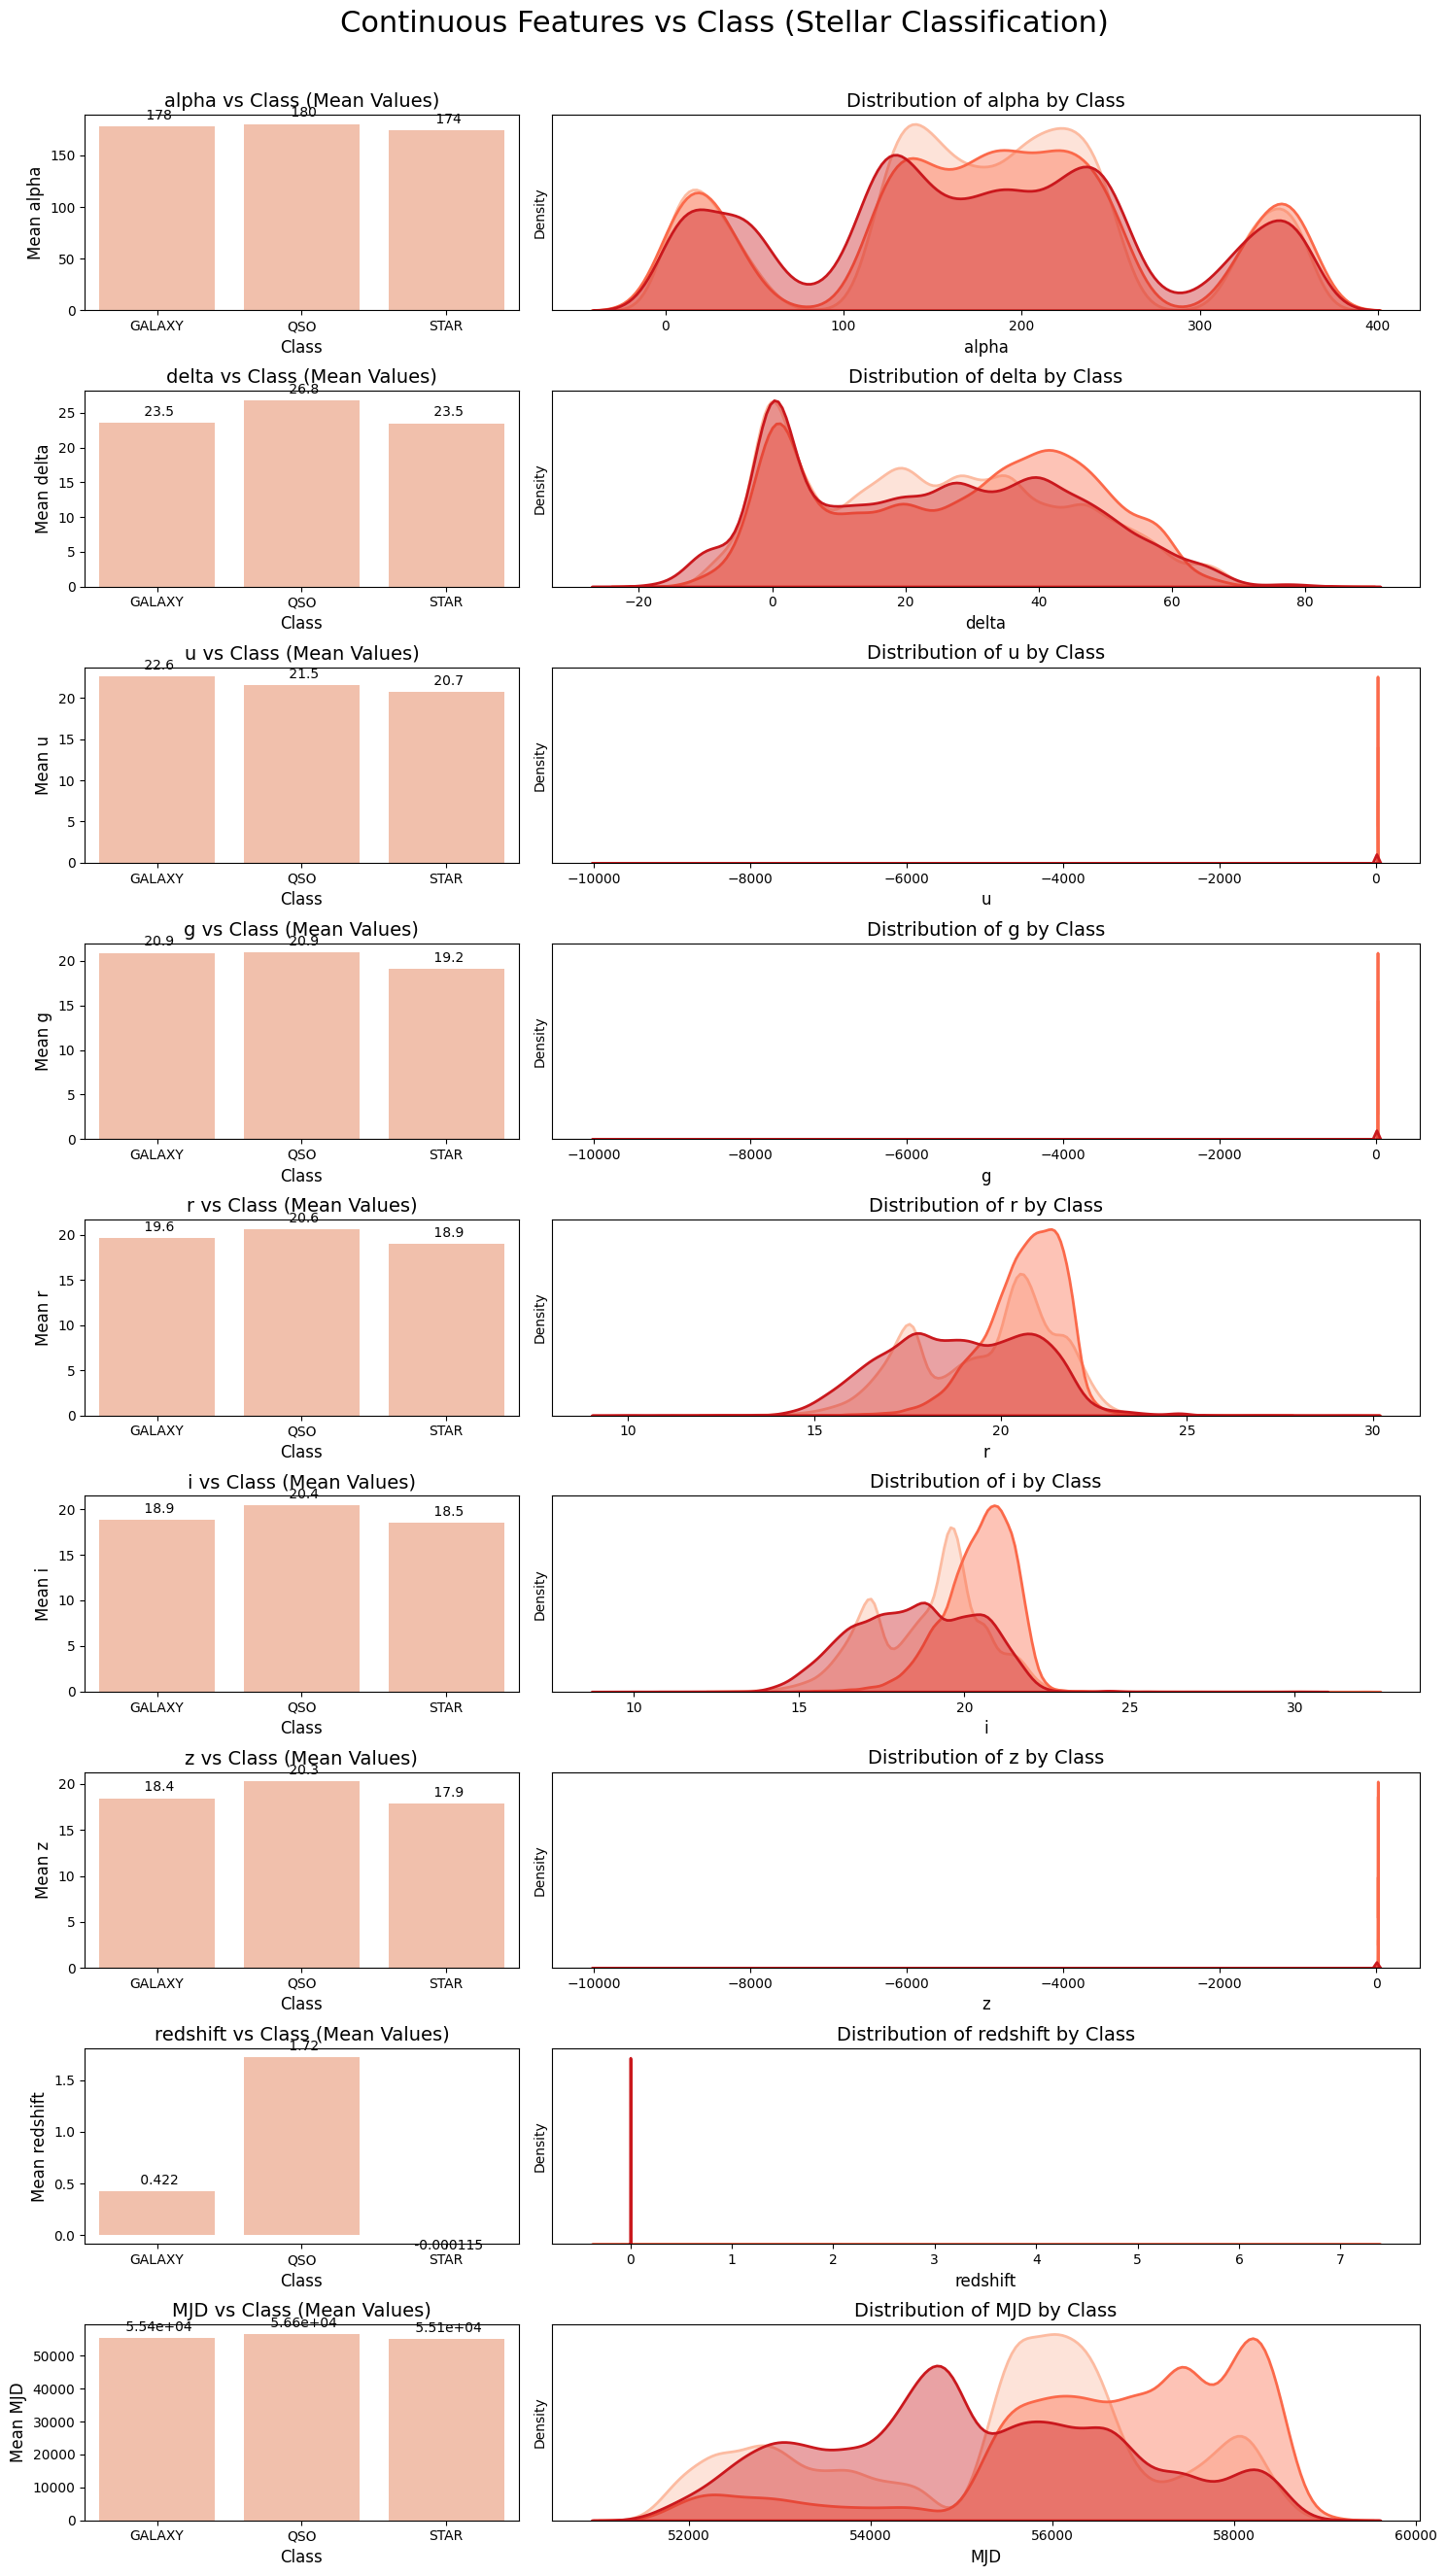

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous features
continuous_features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'MJD']

# Unique classes in target
classes = sorted(data['class'].unique())

# Colors for each class
palette = sns.color_palette('Reds', len(classes))
sns.set_palette(palette)

# Subplots: one row per feature
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15, 3 * len(continuous_features)),
                       gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(continuous_features):

    # --- Barplot (mean value per class) ---
    graph = sns.barplot(data=data, x="class", y=col, ax=ax[i, 0],
                        order=classes, estimator=np.mean, ci=None)

    graph.set_title(f"{col} vs Class (Mean Values)", fontsize=14)
    graph.set_xlabel("Class", fontsize=12)
    graph.set_ylabel(f"Mean {col}", fontsize=12)

    # Bar labels
    for cont in graph.containers:
        graph.bar_label(cont, fmt=' %.3g', padding=3)

    # --- KDE Distribution Plots ---
    for idx, cls in enumerate(classes):
        sns.kdeplot(data=data[data["class"] == cls],
                    x=col, fill=True, linewidth=2,
                    ax=ax[i, 1], label=str(cls),
                    alpha=0.4, color=palette[idx])

    ax[i, 1].set_title(f"Distribution of {col} by Class", fontsize=14)
    ax[i, 1].set_xlabel(col, fontsize=12)
    ax[i, 1].set_yticks([])

    # Handle legend safely
    legend = ax[i, 1].legend_
    if legend is not None:
        if i != 0:  # Keep legend only for first subplot
            legend.remove()

# Final layout
plt.suptitle('Continuous Features vs Class (Stellar Classification)', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()


____
<a id="cat_target"></a>
### <b><span style='color'>Step 4.1.4 |</span><span style='color:'> Categorical Features vs Target</span></b>  

<div style="border-radius:10px; padding: 15px; background-color: ; font-size:115%; text-align:left">

I am going to display __100% stacked bar plots__ for each categorical feature illustrating the proportion of each category across the two target classes, complemented by the exact counts and percentages on the bars.

In [ ]:
# Remove 'class' from the categorical_features (since it is the target)
categorical_features = [feature for feature in categorical_features if feature != 'class']


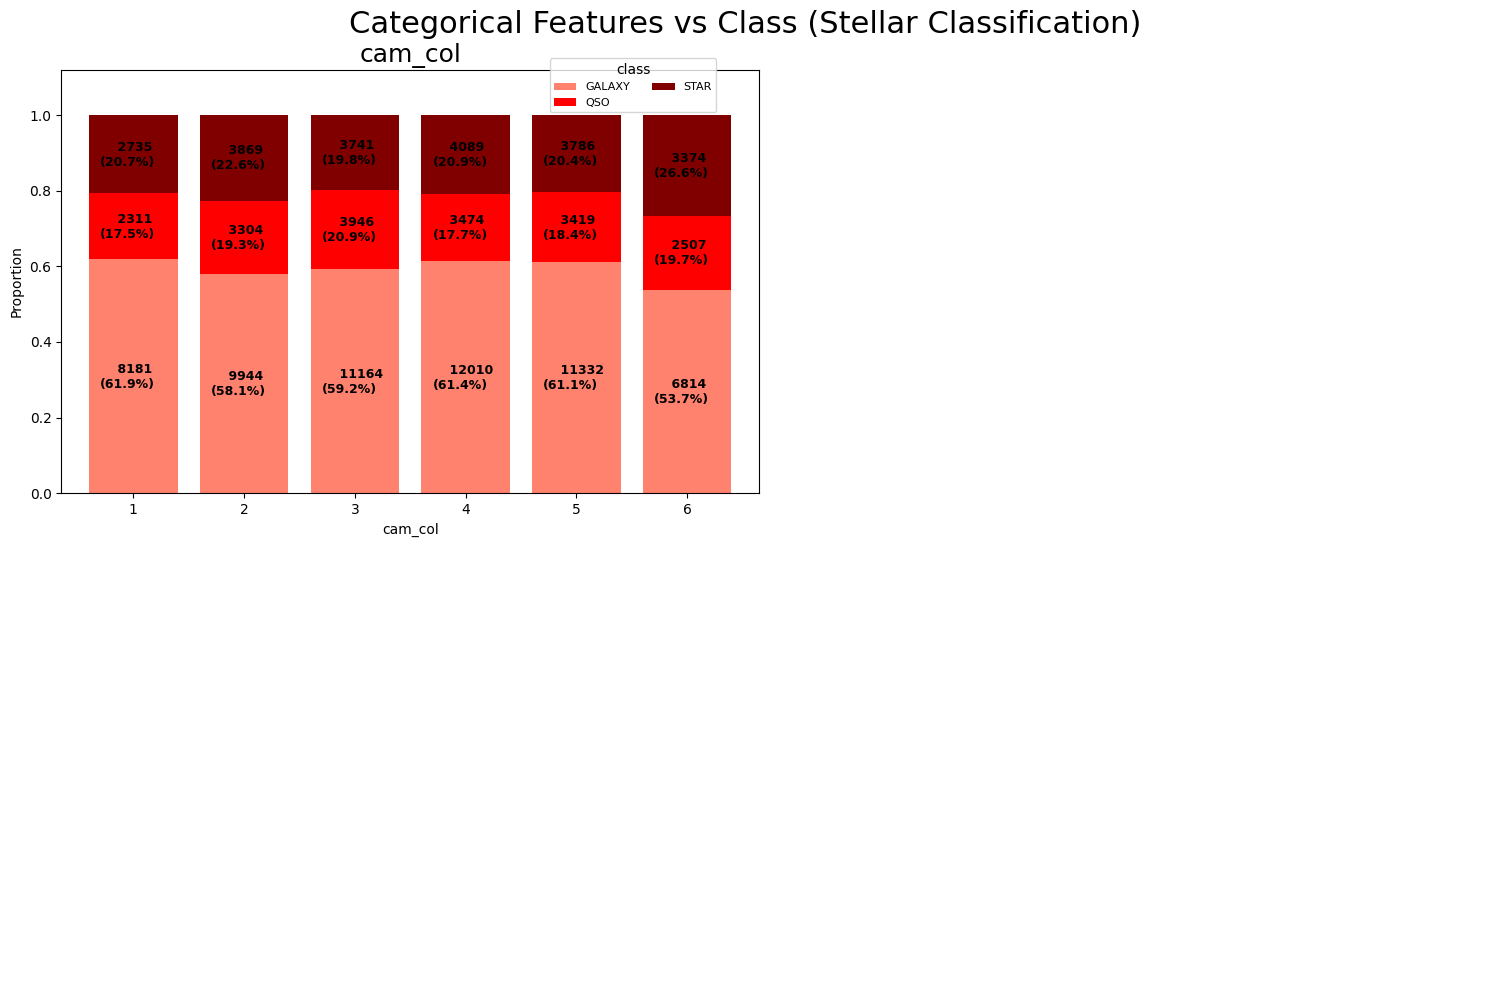

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# make sure categorical_features does NOT contain 'class'
# categorical_features = [f for f in categorical_features if f != 'class']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, col in enumerate(categorical_features):

    # Cross-tab between categorical feature and target 'class'
    cross_tab = pd.crosstab(index=data[col], columns=data['class'])

    # Proportion within each category (row-wise normalization)
    cross_tab_prop = pd.crosstab(index=data[col], columns=data['class'], normalize='index')

    # Define colormap (enough colors for up to 4 classes)
    colors = ['#ff826e', 'red', '#800000', '#660000']
    cmp = ListedColormap(colors[:cross_tab_prop.shape[1]])

    # Decide subplot position
    x, y = i // 2, i % 2

    # Stacked bar plot of proportions
    cross_tab_prop.plot(
        kind='bar',
        ax=ax[x, y],
        stacked=True,
        width=0.8,
        colormap=cmp,
        legend=False,
        ylabel='Proportion',
        sharey=True
    )

    # Add counts + percentages in the bars
    for idx, val in enumerate(cross_tab.index.values):
        for (proportion, count, y_location) in zip(
            cross_tab_prop.loc[val],
            cross_tab.loc[val],
            cross_tab_prop.loc[val].cumsum()
        ):
            ax[x, y].text(
                x=idx - 0.3,
                y=(y_location - proportion) + (proportion / 2) - 0.03,
                s=f'    {count}\n({np.round(proportion * 100, 1)}%)',
                color="black",
                fontsize=9,
                fontweight="bold"
            )

    # Legend per subplot
    ax[x, y].legend(title='class', loc=(0.7, 0.9), fontsize=8, ncol=2)

    # y limit and x labels
    ax[x, y].set_ylim([0, 1.12])
    ax[x, y].set_title(col, fontsize=18)
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)

# Turn off any unused subplot (if you have < 4 categorical features)
for j in range(len(categorical_features), 4):
    x, y = j // 2, j % 2
    ax[x, y].axis('off')

plt.suptitle('Categorical Features vs Class (Stellar Classification)', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


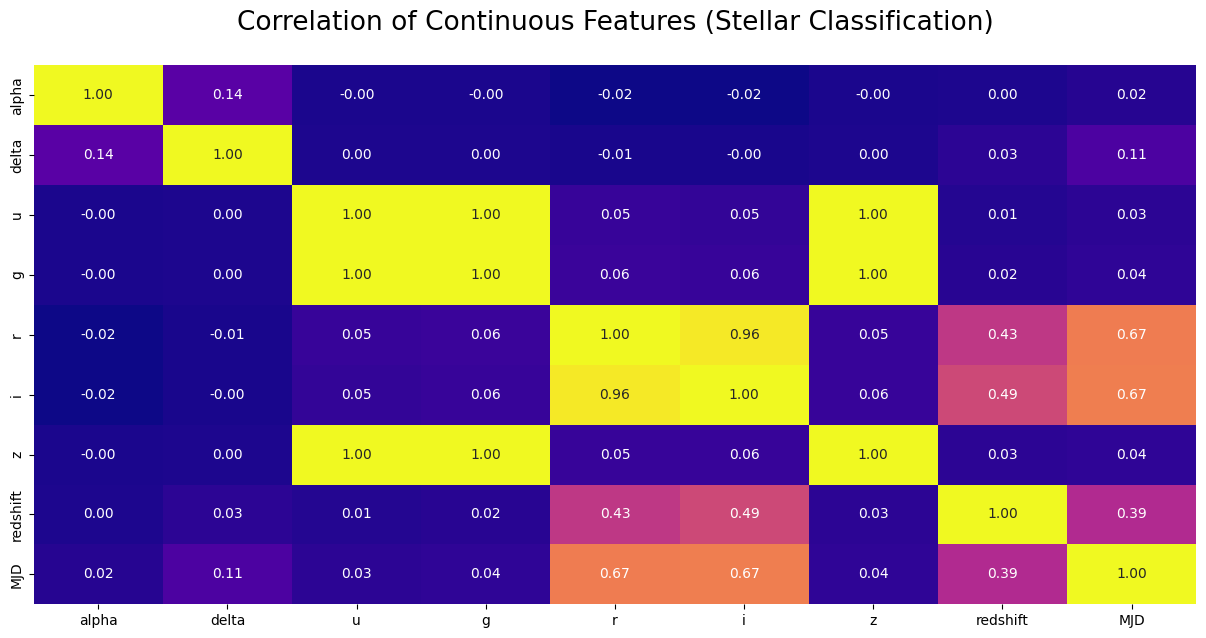

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous features only for correlation
continuous_features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'MJD']

plt.figure(figsize=(15, 7))
plt.title('Correlation of Continuous Features (Stellar Classification)', y=1.05, size=19)

sns.heatmap(
    data[continuous_features].corr(),
    cmap='plasma',
    annot=True,
    fmt='.2f',
    cbar=False
)

plt.show()


<a id="preprocessing"></a>
# <p style="background-color:; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="feature_removal"></a>
# <b><span style='color'>Step 5.1 |</span><span style='color:'> Irrelevant Features Removal</span></b>

As the ID columns are the unique values for the dataset we are checking the values and dreoping form the dataset

In [ ]:
columns = ['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID']
data.drop(columns= columns, axis= 1, inplace= True)

In [ ]:
data

alpha      delta         u         g         r         i  \
0      135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
1      144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
2      142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
3      338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
4      345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   
...           ...        ...       ...       ...       ...       ...   
99995   39.620709  -2.594074  22.16759  22.97586  21.90404  21.30548   
99996   29.493819  19.798874  22.69118  22.38628  20.45003  19.75759   
99997  224.587407  15.700707  21.16916  19.26997  18.20428  17.69034   
99998  212.268621  46.660365  25.35039  21.63757  19.91386  19.07254   
99999  196.896053  49.464643  22.62171  21.79745  20.60115  20.00959   

              z  cam_col   class  redshift  plate    MJD  
0      18.79371        2  GALAXY  0.634794   5812  56354  
1      21.61427        5  GALAXY  0.779136  10445  58158  
2      18.94827        2  GALAXY  0.644195   4576  55592  
3      19.25010        3  GALAXY  0.932346   9149  58039  
4      15.54461        3  GALAXY  0.116123   6121  56187  
...         ...      ...     ...       ...    ...    ...  
99995  20.73569        2  GALAXY  0.000000   9374  57749  
99996  19.41526        1  GALAXY  0.404895   7626  56934  
99997  17.35221        4  GALAXY  0.143366   2764  54535  
99998  18.62482        4  GALAXY  0.455040   6751  56368  
99999  19.28075        4  GALAXY  0.542944   7410  57104  

[100000 rows x 12 columns]

____
<a id="missing"></a>
# <b><span style='color:'>Step 5.2 |</span><span style='color:'> Missing Value Treatment</span></b>

In [ ]:
data.isnull().sum().sum()

np.int64(0)

<div style="border-radius:10px; padding: 15px; background-color: ; font-size:115%; text-align:left">
    
Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

____
<a id="scaling"></a>
# <b><span style='color:'>Step 5.3 |</span><span style='color:'> Feature Scaling</span></b>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
star_data = scaler.fit_transform(star_data)

In [ ]:
star_data

array([[0.37690482, 0.50380246, 0.99911256, ..., 0.09183086, 0.45159189,
        0.64800655],
       [0.40228576, 0.49181212, 0.99920216, ..., 0.11238889, 0.8288413 ,
        0.89432004],
       [0.39495978, 0.53413882, 0.99925055, ..., 0.09316979, 0.35094862,
        0.54396505],
       ...,
       [0.62384846, 0.33880973, 0.99884246, ..., 0.02183899, 0.20340363,
        0.399645  ],
       [0.58962907, 0.6429744 , 0.99925925, ..., 0.06622931, 0.52805146,
        0.64991808],
       [0.54692681, 0.67052516, 0.99898725, ..., 0.07874916, 0.58171159,
        0.75040961]])

In [ ]:

star_data = pd.DataFrame(star_data, columns= ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col',
       'redshift', 'plate', 'MJD'])

In [ ]:
star_data

alpha     delta         u         g         r         i         z  \
0      0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1      0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2      0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3      0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4      0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   
...         ...       ...       ...       ...       ...       ...       ...   
99995  0.110044  0.159072  0.998942  0.999140  0.611752  0.522045  0.999138   
99996  0.081913  0.379072  0.998994  0.999081  0.538130  0.453770  0.999006   
99997  0.623848  0.338810  0.998842  0.998771  0.424420  0.362588  0.998800   
99998  0.589629  0.642974  0.999259  0.999007  0.510982  0.423554  0.998927   
99999  0.546927  0.670525  0.998987  0.999023  0.545782  0.464886  0.998993   

       cam_col  redshift     plate       MJD  
0          0.2  0.091831  0.451592  0.648007  
1          0.8  0.112389  0.828841  0.894320  
2          0.2  0.093170  0.350949  0.543965  
3          0.4  0.134210  0.723312  0.878072  
4          0.4  0.017959  0.476753  0.625205  
...        ...       ...       ...       ...  
99995      0.2  0.001420  0.741633  0.838476  
99996      0.0  0.059087  0.599300  0.727198  
99997      0.6  0.021839  0.203404  0.399645  
99998      0.6  0.066229  0.528051  0.649918  
99999      0.6  0.078749  0.581712  0.750410  

[100000 rows x 11 columns]

In [ ]:
star_data['class'] = data['class']

In [ ]:
star_data

alpha     delta         u         g         r         i         z  \
0      0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1      0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2      0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3      0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4      0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   
...         ...       ...       ...       ...       ...       ...       ...   
99995  0.110044  0.159072  0.998942  0.999140  0.611752  0.522045  0.999138   
99996  0.081913  0.379072  0.998994  0.999081  0.538130  0.453770  0.999006   
99997  0.623848  0.338810  0.998842  0.998771  0.424420  0.362588  0.998800   
99998  0.589629  0.642974  0.999259  0.999007  0.510982  0.423554  0.998927   
99999  0.546927  0.670525  0.998987  0.999023  0.545782  0.464886  0.998993   

       cam_col  redshift     plate       MJD   class  
0          0.2  0.091831  0.451592  0.648007  GALAXY  
1          0.8  0.112389  0.828841  0.894320  GALAXY  
2          0.2  0.093170  0.350949  0.543965  GALAXY  
3          0.4  0.134210  0.723312  0.878072  GALAXY  
4          0.4  0.017959  0.476753  0.625205  GALAXY  
...        ...       ...       ...       ...     ...  
99995      0.2  0.001420  0.741633  0.838476  GALAXY  
99996      0.0  0.059087  0.599300  0.727198  GALAXY  
99997      0.6  0.021839  0.203404  0.399645  GALAXY  
99998      0.6  0.066229  0.528051  0.649918  GALAXY  
99999      0.6  0.078749  0.581712  0.750410  GALAXY  

[100000 rows x 12 columns]

**Checking Distribution of the target variable 'class' before analysis**

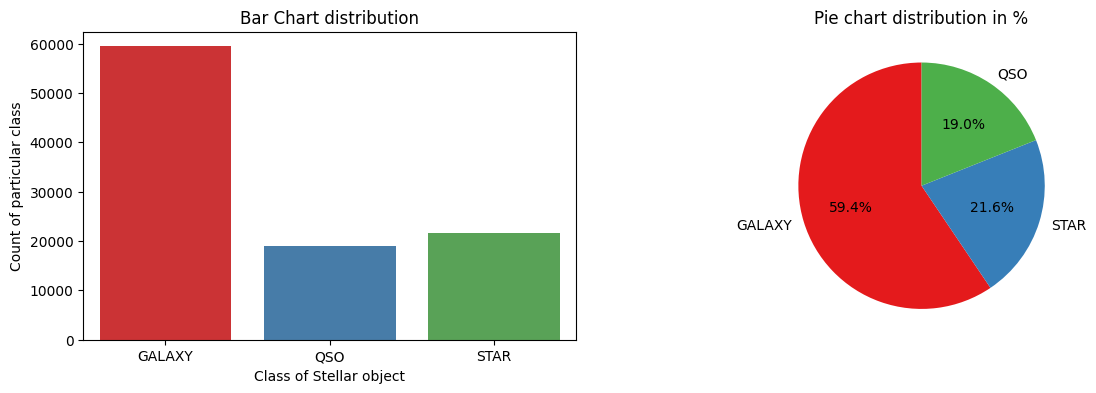

In [ ]:
plt.figure(figsize= (14,4))

plt.subplot(1,2,1)
palette_colors = sns.color_palette("Set1")
ax = sns.countplot(data= star_data, x= 'class', palette= palette_colors)
plt.xlabel("Class of Stellar object")
plt.ylabel("Count of particular class")
plt.title("Bar Chart distribution")


plt.subplot(1,2,2)
distribution = data['class'].value_counts()
plt.pie(x=distribution, labels= distribution.index, autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('Set1') )
plt.title("Pie chart distribution in %")
plt.show()

____
<a id="encoding"></a>
# <b><span style='color:'>Step 5.4 |</span><span style='color:'> Categorical Features Encoding</span></b>

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(star_data['class'])
print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
joblib.dump(le, "label_encoder.joblib")

Mapping: {'GALAXY': np.int64(0), 'QSO': np.int64(1), 'STAR': np.int64(2)}


['label_encoder.joblib']

____
<a id="outlier"></a>
# <b><span style='color:'>Step 5.5 |</span><span style='color:'> Outlier Treatment</span></b>

<div style="border-radius:10px; padding: 15px; background-color: ; font-size:115%; text-align:left">

I am going to check for outliers using the __IQR method__ for the continuous features:

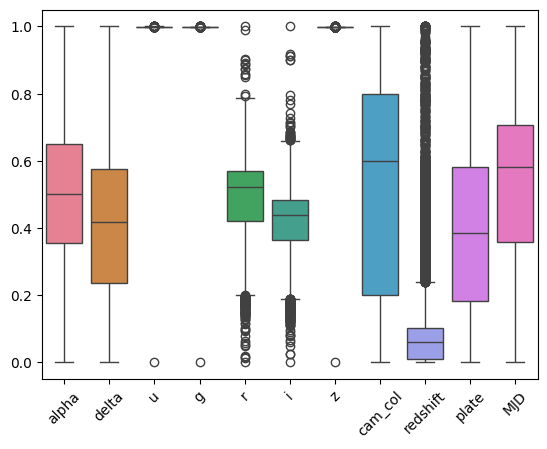

In [ ]:
sns.boxplot(data=star_data)
plt.xticks(rotation=45)
plt.show()

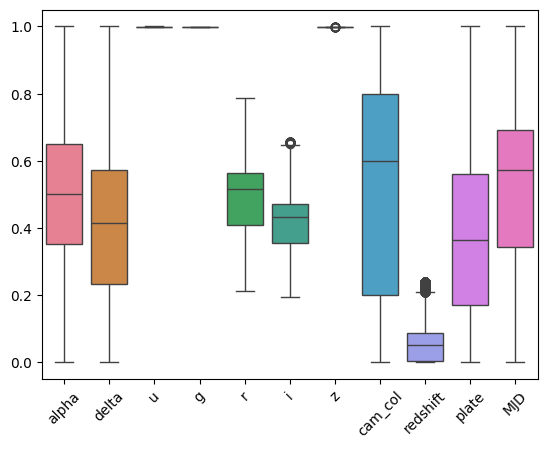

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter out the outliers
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return filtered_df

# Create a copy of the data
data_clean = star_data.copy()

# Remove outliers for each numeric column
for col in data_clean.select_dtypes(include='number').columns:
    data_clean = remove_outliers(data_clean, col)

# Plot the boxplot with outliers removed
sns.boxplot(data=data_clean)
plt.xticks(rotation=45)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: ; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Sensitivity to Outliers:</font></h3>

* __SVM (Support Vector Machine)__: SVMs can be sensitive to outliers. While the decision boundary is determined primarily by the support vectors, outliers can influence which data points are chosen as support vectors, potentially leading to suboptimal classification.
    
    
* __Decision Trees (DT) and Random Forests (RF)__: These tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.
    
    
* __K-Nearest Neighbors (KNN)__: KNN is sensitive to outliers because it relies on distances between data points to make predictions. Outliers can distort these distances.
    
    
* __AdaBoost:__ This ensemble method, which often uses decision trees as weak learners, is generally robust to outliers. However, the iterative nature of AdaBoost can sometimes lead to overemphasis on outliers, making the final model more sensitive to them.

<div style="border-radius:10px; padding: 15px; background-color: ; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Approaches for Outlier Treatment:</font></h3>
    
* __Removal of Outliers__: Directly discard data points that fall outside of a defined range, typically based on a method like the Interquartile Range (IQR).

    
* __Capping Outliers__: Instead of removing, we can limit outliers to a certain threshold, such as the 1st or 99th percentile.
    
    
* __Transformations__: Applying transformations like log or Box-Cox can reduce the impact of outliers and make the data more Gaussian-like.
    
    
* __Robust Scaling__: Techniques like the RobustScaler in Scikit-learn can be used, which scales features using statistics that are robust to outliers.

<div style="border-radius:10px; padding: 15px; background-color: ; font-size:120%; text-align:left">

<h3 align="left"><font color=red>Conclusion:</font></h3>

Given __the nature of the algorithms (especially SVM and KNN)__ and __the small size of our dataset__, direct removal of outliers might not be the best approach. Instead, __we'll focus on applying transformations like Box-Cox in the subsequent steps__ to reduce the impact of outliers and make the data more suitable for modeling.

____
<a id="transform"></a>
# <b><span style='color:'>Step 5.6 |</span><span style='color:'> Univariate Analysis</span></b>

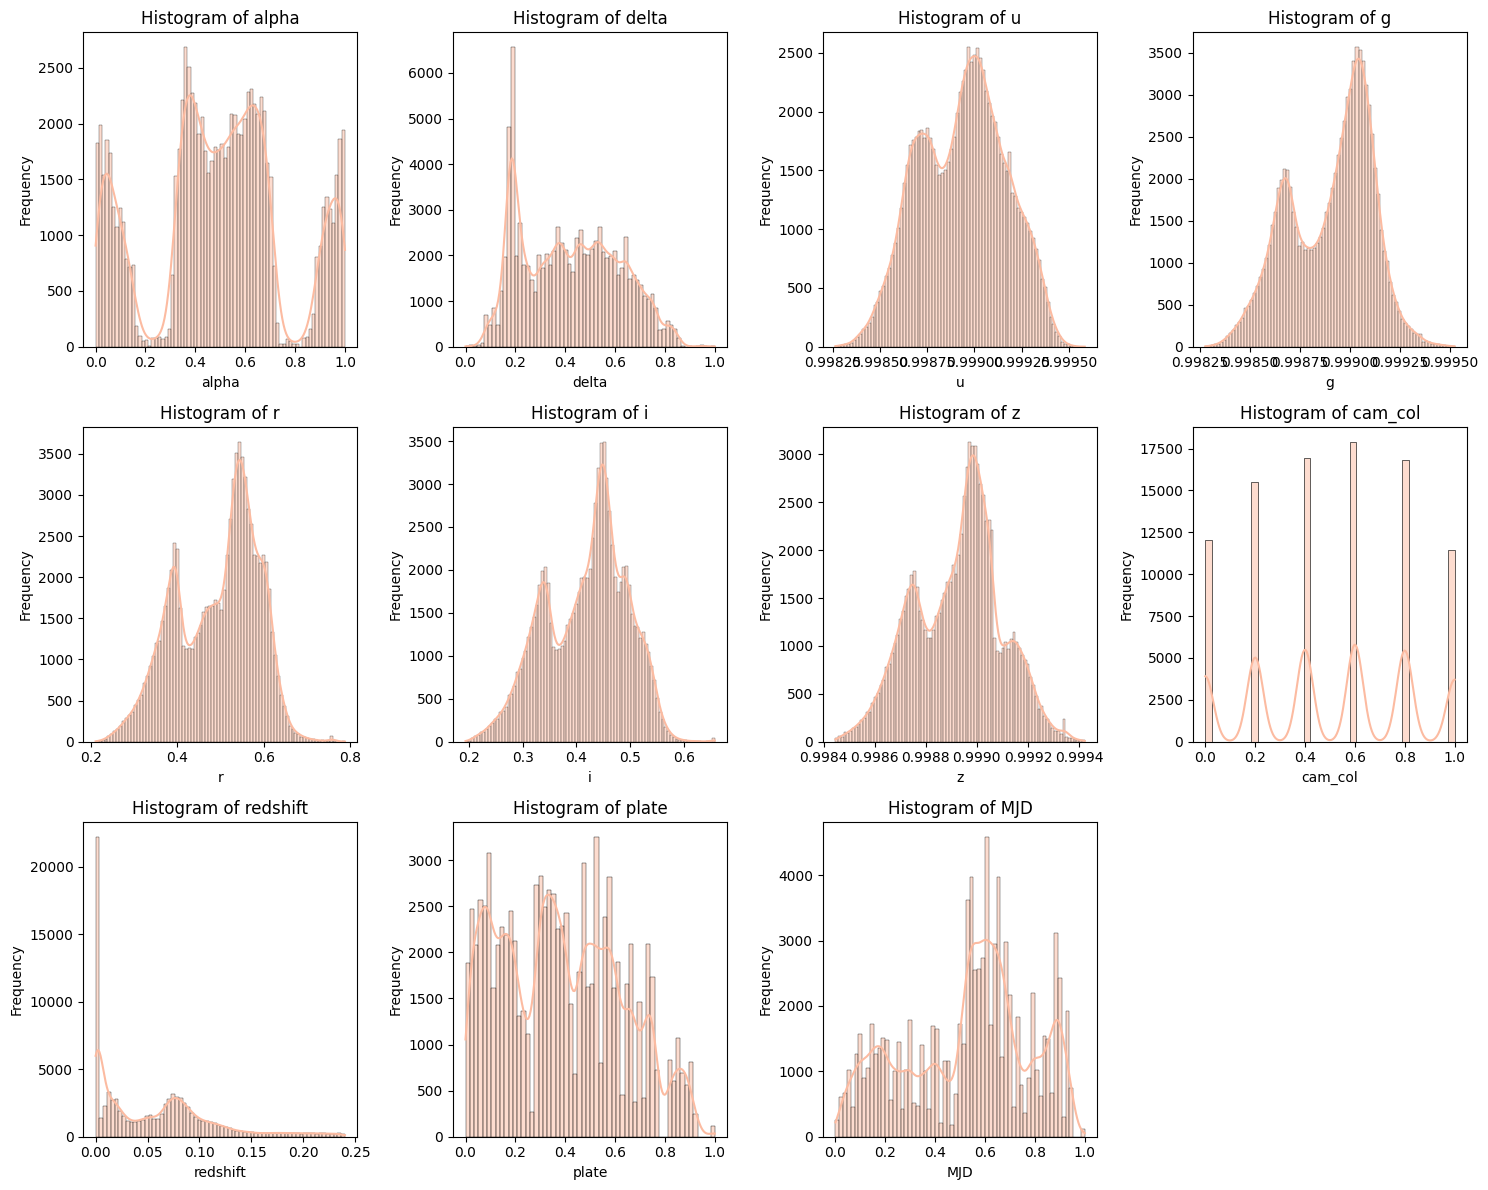

In [ ]:
import math

# Select numeric columns from the dataset
numeric_columns = data_clean.select_dtypes(include='number').columns

# Calculate the number of rows needed based on the number of columns
n_cols = 4
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Set up the subplot grid with 3 columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))

# Flatten axes in case it's a 2D array
axes = axes.flatten()

# Create a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data_clean[col], ax=axes[i], kde=True)  # Plot with KDE curve
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots, if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
data_clean.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1  0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2  0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3  0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4  0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   

   cam_col  redshift     plate       MJD   class  
0      0.2  0.091831  0.451592  0.648007  GALAXY  
1      0.8  0.112389  0.828841  0.894320  GALAXY  
2      0.2  0.093170  0.350949  0.543965  GALAXY  
3      0.4  0.134210  0.723312  0.878072  GALAXY  
4      0.4  0.017959  0.476753  0.625205  GALAXY

____
<a id="transform"></a>
# <b><span style='color:'>Step 5.7 |</span><span style='color:'> Bivariate Analysis</span></b>

In [ ]:
columns1 = ['alpha', 'delta', 'u', 'g', 'r', 'class']
columns2 = ['i', 'z', 'cam_col', 'redshift', 'plate', 'MJD', 'class']

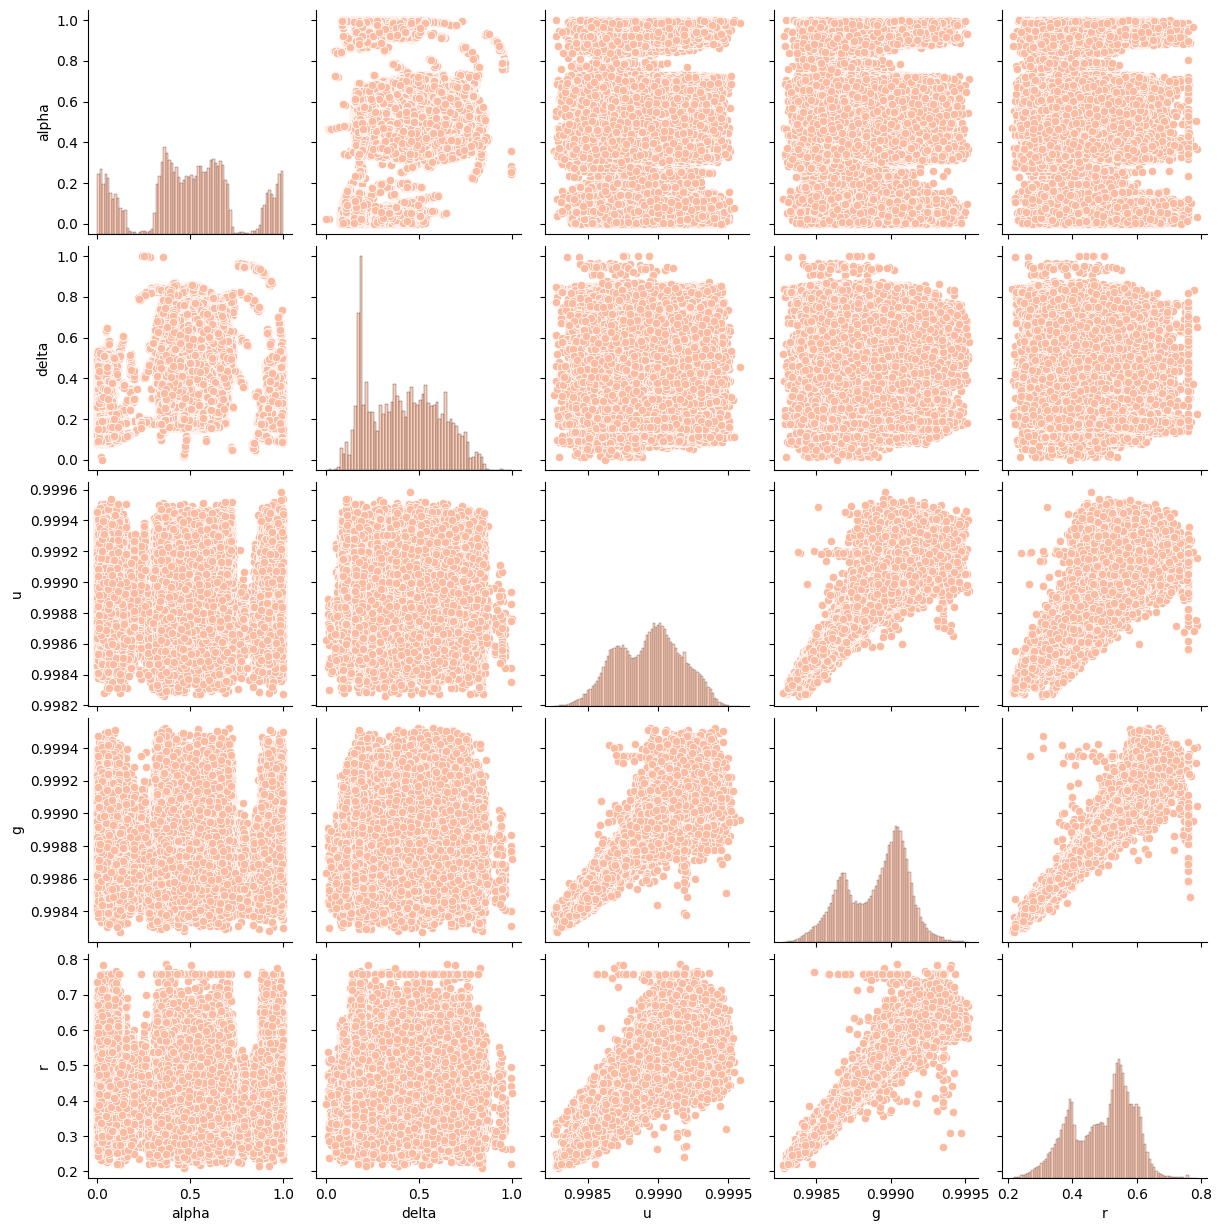

In [ ]:

sns.pairplot(data=data_clean[columns1])
plt.show()

____
<a id="transform"></a>
# <b><span style='color:'>Step 5.8 |</span><span style='color:'> Splitting the Dataset</span></b>

In [ ]:
X = data_clean.drop('class', axis = 1)
y = data_clean['class']
X.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.999113  0.999070  0.535344  0.427665  0.998944   
1  0.402286  0.491812  0.999202  0.999126  0.646203  0.515986  0.999225   
2  0.394960  0.534139  0.999251  0.999109  0.546218  0.435729  0.998959   
3  0.940947  0.180600  0.998939  0.999220  0.596946  0.486717  0.998990   
4  0.959118  0.392679  0.998670  0.998602  0.337999  0.287021  0.998620   

   cam_col  redshift     plate       MJD  
0      0.2  0.091831  0.451592  0.648007  
1      0.8  0.112389  0.828841  0.894320  
2      0.2  0.093170  0.350949  0.543965  
3      0.4  0.134210  0.723312  0.878072  
4      0.4  0.017959  0.476753  0.625205

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)
X_train.shape, y_train.shape

((67950, 11), (67950,))

<a id="dt"></a>
# <p style="background-color:; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Decision Tree Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="dt_base"></a>
# <b><span style='color:'>Step 6.1 |</span><span style='color:'> DT Base Model Definition</span></b>

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
y_pred_DT = model_DT.predict(X_test)

____
<a id="dt_eval"></a>
# <b><span style='color:'>Step 6.2 |</span><span style='color:'> DT Model Evaluation</span></b>

In [ ]:
# Decision Tree Evaluation
accuracy_DT = accuracy_score(y_test, y_pred_DT)

# Weighted precision and recall (due to class imbalance)
precision_DT = precision_score(y_test, y_pred_DT, average='weighted')
recall_DT = recall_score(y_test, y_pred_DT, average='weighted')

# Class-wise precision and recall
precision_DT_class = precision_score(y_test, y_pred_DT, average=None)
recall_DT_class = recall_score(y_test, y_pred_DT, average=None)

f1_DT = f1_score(y_test, y_pred_DT, average= 'weighted')
confusion_DT = confusion_matrix(y_test, y_pred_DT)
classi_DT = classification_report(y_test, y_pred_DT)

# Print weighted metrics
print(f"The Accuracy score for Decision Tree Classifier is {accuracy_DT:.2f}")
print(f"The Weighted Precision score for Decision Tree Classifier is {precision_DT:.2f}")
print(f"The Weighted Recall score for Decision Tree Classifier is {recall_DT:.2f}")

# Print confusion matrix, classification report and f1_score
print(f"The F1 score for Decision Tree Classifier is {f1_DT:.4f}")
print(f"The Confusion Matrix for Decision Tree Classifier is \n{confusion_DT}")
print(f"The Classification Report for Decision Tree Classifier is \n{classi_DT}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_DT_class[idx]:.2f}, Recall: {recall_DT_class[idx]:.2f}")

The Accuracy score for Decision Tree Classifier is 0.96
The Weighted Precision score for Decision Tree Classifier is 0.96
The Weighted Recall score for Decision Tree Classifier is 0.96
The F1 score for Decision Tree Classifier is 0.9590
The Confusion Matrix for Decision Tree Classifier is 
[[14400   457    20]
 [  427  2080     1]
 [   25     1  5239]]
The Classification Report for Decision Tree Classifier is 
              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     14877
         QSO       0.82      0.83      0.82      2508
        STAR       1.00      1.00      1.00      5265

    accuracy                           0.96     22650
   macro avg       0.93      0.93      0.93     22650
weighted avg       0.96      0.96      0.96     22650


Class-wise Precision and Recall:
Class QSO - Precision: 0.97, Recall: 0.97
Class STAR - Precision: 0.82, Recall: 0.83
Class GALAXY - Precision: 1.00, Recall: 1.00


<a id="rf"></a>
# <p style="background-color:; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Random Forest Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="rf_base"></a>
# <b><span style='color:'>Step 7.1 |</span><span style='color:'> RF Base Model Definition</span></b>

In [ ]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
y_pred_RF = model_DT.predict(X_test)

____
<a id="rf_eval"></a>
# <b><span style='color:'>Step 7.2 |</span><span style='color:'> RF Model Evaluation</span></b>

In [ ]:
# Random Forest Evaluation
accuracy_RF = accuracy_score(y_test, y_pred_RF)

# Weighted precision and recall (due to class imbalance)
precision_RF = precision_score(y_test, y_pred_RF, average='weighted')
recall_RF = recall_score(y_test, y_pred_RF, average='weighted')

# Class-wise precision and recall
precision_RF_class = precision_score(y_test, y_pred_RF, average=None)
recall_RF_class = recall_score(y_test, y_pred_RF, average=None)

f1_RF = f1_score(y_test, y_pred_RF, average='weighted')
confusion_RF = confusion_matrix(y_test, y_pred_RF)
classi_RF = classification_report(y_test, y_pred_RF)

# Print weighted metrics
print(f"The Accuracy score for Random Forest Classifier is {accuracy_RF:.2f}")
print(f"The Weighted Precision score for Random Forest Classifier is {precision_RF:.2f}")
print(f"The Weighted Recall score for Random Forest Classifier is {recall_RF:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Random Forest Classifier is {f1_RF:.4f}")
print(f"The Confusion Matrix for Random Forest Classifier is \n{confusion_RF}")
print(f"The Classification Report for Random Forest Classifier is \n{classi_RF}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_RF_class[idx]:.2f}, Recall: {recall_RF_class[idx]:.2f}")

The Accuracy score for Random Forest Classifier is 0.96
The Weighted Precision score for Random Forest Classifier is 0.96
The Weighted Recall score for Random Forest Classifier is 0.96
The F1 score for Random Forest Classifier is 0.9590
The Confusion Matrix for Random Forest Classifier is 
[[14400   457    20]
 [  427  2080     1]
 [   25     1  5239]]
The Classification Report for Random Forest Classifier is 
              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     14877
         QSO       0.82      0.83      0.82      2508
        STAR       1.00      1.00      1.00      5265

    accuracy                           0.96     22650
   macro avg       0.93      0.93      0.93     22650
weighted avg       0.96      0.96      0.96     22650


Class-wise Precision and Recall:
Class QSO - Precision: 0.97, Recall: 0.97
Class STAR - Precision: 0.82, Recall: 0.83
Class GALAXY - Precision: 1.00, Recall: 1.00


<a id="logistic"></a>
# <p style="background-color:; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | KNN Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="logistic_base"></a>
# <b><span style='color:'>Step 8.1 |</span><span style='color:'> KNN Base Model Definition</span></b>

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

____
<a id="logistic_eval"></a>
# <b><span style='color:'>Step 8.2 |</span><span style='color:'> KNN Model Evaluation</span></b>

In [ ]:
# KNN Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Class-wise precision and recall
precision_knn_class = precision_score(y_test, y_pred_knn, average=None)
recall_knn_class = recall_score(y_test, y_pred_knn, average=None)

f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
confusion_knn = confusion_matrix(y_test, y_pred_knn)
classi_knn = classification_report(y_test, y_pred_knn)

# Print weighted metrics
print(f"The Accuracy score for K Nearest Neighbours Classifier is {accuracy_knn:.2f}")
print(f"The Weighted Precision score for K Nearest Neighbours Classifier is {precision_knn:.2f}")
print(f"The Weighted Recall score for K Nearest Neighbours Classifier is {recall_knn:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for K Nearest Neighbours Classifier is {f1_knn:.4f}")
print(f"The Confusion Matrix for K Nearest Neighbours Classifier is \n{confusion_knn}")
print(f"The Classification Report for K Nearest Neighbours Classifier is \n{classi_knn}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_knn_class[idx]:.2f}, Recall: {recall_knn_class[idx]:.2f}")

The Accuracy score for K Nearest Neighbours Classifier is 0.90
The Weighted Precision score for K Nearest Neighbours Classifier is 0.90
The Weighted Recall score for K Nearest Neighbours Classifier is 0.90
The F1 score for K Nearest Neighbours Classifier is 0.8949
The Confusion Matrix for K Nearest Neighbours Classifier is 
[[14274   151   452]
 [  806  1661    41]
 [  859     6  4400]]
The Classification Report for K Nearest Neighbours Classifier is 
              precision    recall  f1-score   support

      GALAXY       0.90      0.96      0.93     14877
         QSO       0.91      0.66      0.77      2508
        STAR       0.90      0.84      0.87      5265

    accuracy                           0.90     22650
   macro avg       0.90      0.82      0.85     22650
weighted avg       0.90      0.90      0.89     22650


Class-wise Precision and Recall:
Class QSO - Precision: 0.90, Recall: 0.96
Class STAR - Precision: 0.91, Recall: 0.66
Class GALAXY - Precision: 0.90, Recall: 0.84

<a id="svm"></a>
# <p style="background-color:; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | SVM Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="svm_base"></a>
# <b><span style='color:'>Step 9.1 |</span><span style='color:'> SVM Base Model Definition</span></b>

In [ ]:
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

____
<a id="svm_eval"></a>
# <b><span style='color:'>Step 9.2 |</span><span style='color:'> SVM Model Evaluation</span></b>

In [ ]:
# SVC Evaluation
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')

# Class-wise precision and recall
precision_svc_class = precision_score(y_test, y_pred_svc, average=None)
recall_svc_class = recall_score(y_test, y_pred_svc, average=None)

f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
confusion_svc = confusion_matrix(y_test, y_pred_svc)
classi_svc = classification_report(y_test, y_pred_svc)

# Print weighted metrics
print(f"The Accuracy score for Support Vector Machine Classifier is {accuracy_svc:.2f}")
print(f"The Weighted Precision score for Support Vector Machine Classifier is {precision_svc:.2f}")
print(f"The Weighted Recall score for Support Vector Machine Classifier is {recall_svc:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Support Vector Machines Classifier is {f1_svc:.4f}")
print(f"The Confusion Matrix for Support Vector Machine Classifier is \n{confusion_svc}")
print(f"The Classification Report for Support Vector Machine Classifier is \n{classi_svc}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_svc_class[idx]:.2f}, Recall: {recall_svc_class[idx]:.2f}")

The Accuracy score for Support Vector Machine Classifier is 0.93
The Weighted Precision score for Support Vector Machine Classifier is 0.93
The Weighted Recall score for Support Vector Machine Classifier is 0.93
The F1 score for Support Vector Machines Classifier is 0.9297
The Confusion Matrix for Support Vector Machine Classifier is 
[[14192   178   507]
 [  697  1800    11]
 [  163     0  5102]]
The Classification Report for Support Vector Machine Classifier is 
              precision    recall  f1-score   support

      GALAXY       0.94      0.95      0.95     14877
         QSO       0.91      0.72      0.80      2508
        STAR       0.91      0.97      0.94      5265

    accuracy                           0.93     22650
   macro avg       0.92      0.88      0.90     22650
weighted avg       0.93      0.93      0.93     22650


Class-wise Precision and Recall:
Class QSO - Precision: 0.94, Recall: 0.95
Class STAR - Precision: 0.91, Recall: 0.72
Class GALAXY - Precision: 0.91,

<a id="svm"></a>
# <p style="background-color:; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10 | Gradient Boosting Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="svm_base"></a>
# <b><span style='color:'>Step 10.1 |</span><span style='color:'> Gradient Boosting Base Model Definition</span></b>

In [ ]:
model_gb = GradientBoostingClassifier(n_estimators=100, loss='log_loss', random_state=100)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

____
<a id="svm_base"></a>
# <b><span style='color:'>Step 10.2 |</span><span style='color:'> Gradient Boosting Model Evaluationn</span></b>

In [ ]:
# Gradient Boosting Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')

# Class-wise precision and recall
precision_gb_class = precision_score(y_test, y_pred_gb, average=None)
recall_gb_class = recall_score(y_test, y_pred_gb, average=None)

f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
confusion_gb = confusion_matrix(y_test, y_pred_gb)
classi_gb = classification_report(y_test, y_pred_gb)

# Print weighted metrics
print(f"The Accuracy score for Gradient Boosting Classifier is {accuracy_gb:.2f}")
print(f"The Weighted Precision score for Gradient Boosting Classifier is {precision_gb:.2f}")
print(f"The Weighted Recall score for Gradient Boosting Classifier is {recall_gb:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Gradient Boosting Classifier is {f1_gb:.4f}")
print(f"The Confusion Matrix for Gradient Boosting Classifier is \n{confusion_gb}")
print(f"The Classification Report for Gradient Boosting Classifier is \n{classi_gb}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_gb_class[idx]:.2f}, Recall: {recall_gb_class[idx]:.2f}")

The Accuracy score for Gradient Boosting Classifier is 0.97
The Weighted Precision score for Gradient Boosting Classifier is 0.97
The Weighted Recall score for Gradient Boosting Classifier is 0.97
The F1 score for Gradient Boosting Classifier is 0.9732
The Confusion Matrix for Gradient Boosting Classifier is 
[[14685   171    21]
 [  399  2108     1]
 [    4     0  5261]]
The Classification Report for Gradient Boosting Classifier is 
              precision    recall  f1-score   support

      GALAXY       0.97      0.99      0.98     14877
         QSO       0.92      0.84      0.88      2508
        STAR       1.00      1.00      1.00      5265

    accuracy                           0.97     22650
   macro avg       0.96      0.94      0.95     22650
weighted avg       0.97      0.97      0.97     22650


Class-wise Precision and Recall:
Class QSO - Precision: 0.97, Recall: 0.99
Class STAR - Precision: 0.92, Recall: 0.84
Class GALAXY - Precision: 1.00, Recall: 1.00


<a id="svm"></a>
# <p style="background-color:; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 | Decision Tree Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="svm_base"></a>
# <b><span style='color:'>Step 11.1 |</span><span style='color:'> Decision Tree Base Model Definition</span></b>

In [ ]:
weaker_learner = DecisionTreeClassifier(max_depth= 1)
model_ab = AdaBoostClassifier(estimator= weaker_learner, n_estimators= 50, learning_rate= 1.0)
model_ab.fit(X_train, y_train)

y_pred_ab = model_ab.predict(X_test)

____
<a id="svm_hp"></a>
# <b><span style='color:'>Step 11.2 |</span><span style='color:'> Decision Tree Model Evaluation</span></b>

In [ ]:
# AdaBoost Evaluation
accuracy_ab = accuracy_score(y_test, y_pred_ab)

# Retrieve precision and recall for each class
precision_ab_class = precision_score(y_test, y_pred_ab, average=None)
recall_ab_class = recall_score(y_test, y_pred_ab, average=None)

# Calculate weighted precision and recall
precision_ab = precision_score(y_test, y_pred_ab, average='weighted')
recall_ab = recall_score(y_test, y_pred_ab, average='weighted')

f1_ab = f1_score(y_test, y_pred_ab, average='weighted')
confusion_ab = confusion_matrix(y_test, y_pred_ab)
classi_ab = classification_report(y_test, y_pred_ab)

# Print overall accuracy and weighted metrics
print(f"The Accuracy score for AdaBoosting Classifier is {accuracy_ab:.2f}")
print(f"The Weighted Precision score for AdaBoosting Classifier is {precision_ab:.2f}")
print(f"The Weighted Recall score for AdaBoosting Classifier is {recall_ab:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for AdaBoost Classifier is {f1_ab:.4f}")
print(f"The Confusion Matrix for AdaBoosting Classifier is \n{confusion_ab}")
print(f"The Classification Report for AdaBoosting Classifier is \n{classi_ab}")

# Display precision and recall for each class
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_ab_class[idx]:.2f}, Recall: {recall_ab_class[idx]:.2f}")

The Accuracy score for AdaBoosting Classifier is 0.92
The Weighted Precision score for AdaBoosting Classifier is 0.92
The Weighted Recall score for AdaBoosting Classifier is 0.92
The F1 score for AdaBoost Classifier is 0.9176
The Confusion Matrix for AdaBoosting Classifier is 
[[13636  1099   142]
 [  669  1838     1]
 [    7     0  5258]]
The Classification Report for AdaBoosting Classifier is 
              precision    recall  f1-score   support

      GALAXY       0.95      0.92      0.93     14877
         QSO       0.63      0.73      0.68      2508
        STAR       0.97      1.00      0.99      5265

    accuracy                           0.92     22650
   macro avg       0.85      0.88      0.87     22650
weighted avg       0.92      0.92      0.92     22650


Class-wise Precision and Recall:
Class QSO - Precision: 0.95, Recall: 0.92
Class STAR - Precision: 0.63, Recall: 0.73
Class GALAXY - Precision: 0.97, Recall: 1.00


<a id="svm"></a>
# <p style="background-color:; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 12 | XGBoost Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="svm_base"></a>
# <b><span style='color:'>Step 12.1 |</span><span style='color:'> XGBoost Base Model Definition</span></b>

In [ ]:
# Initialize XGBoost Classifier
model_xgb = xgb.XGBClassifier()

# Encode target variable before training
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Train the model
model_xgb.fit(X_train, y_train_encoded)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

____
<a id="svm_eval"></a>
# <b><span style='color:'>Step 12.2 |</span><span style='color:'> XGBoost Model Evaluation</span></b>

In [ ]:
# Accuracy score for XGBoost
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)

# Precision score with 'weighted' average for multiclass classification
precision_xgb = precision_score(y_test_encoded, y_pred_xgb, average='weighted')

# Recall score with 'weighted' average for multiclass classification
recall_xgb = recall_score(y_test_encoded, y_pred_xgb, average='weighted')

# Retrieve precision and recall for each class
precision_xgb_class = precision_score(y_test_encoded, y_pred_xgb, average=None)
recall_xgb_class = recall_score(y_test_encoded, y_pred_xgb, average=None)

f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')



# Confusion matrix for XGBoost
confusion_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# Classification report for XGBoost (which includes precision, recall, f1-score for each class)
classi_xgb = classification_report(y_test_encoded, y_pred_xgb)

# Print the results
print(f"The Accuracy score for XGBoost Classifier is {accuracy_xgb:.2f}")
print(f"The Weighted Precision score for XGBoost Classifier is {precision_xgb:.2f}")
print(f"The Weighted Recall score for XGBoost Classifier is {recall_xgb:.2f}")
print(f"The F1 score for XGBoost Classifier is {f1_xgb:.4f}")
print(f"The Confusion Matrix for XGBoost Classifier is \n{confusion_xgb}")
print(f"The Classification Report for XGBoost Classifier is \n{classi_xgb}")

# Display precision and recall for each class
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(le.classes_):
    print(f"Class {class_value} - Precision: {precision_xgb_class[idx]:.2f}, Recall: {recall_xgb_class[idx]:.2f}")

The Accuracy score for XGBoost Classifier is 0.97
The Weighted Precision score for XGBoost Classifier is 0.97
The Weighted Recall score for XGBoost Classifier is 0.97
The F1 score for XGBoost Classifier is 0.9730
The Confusion Matrix for XGBoost Classifier is 
[[14639   198    40]
 [  344  2163     1]
 [   22     0  5243]]
The Classification Report for XGBoost Classifier is 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14877
           1       0.92      0.86      0.89      2508
           2       0.99      1.00      0.99      5265

    accuracy                           0.97     22650
   macro avg       0.96      0.95      0.95     22650
weighted avg       0.97      0.97      0.97     22650


Class-wise Precision and Recall:
Class GALAXY - Precision: 0.98, Recall: 0.98
Class QSO - Precision: 0.92, Recall: 0.86
Class STAR - Precision: 0.99, Recall: 1.00


<a id="prediction"></a>
# <p style="background-color:; font-family:calibri; color:; font-size:150%; text-align:center; border-radius:15px 50px;">Step 13 | Model Comparision</p>

⬆️ [Table of Contents](#contents_tabel)

In [ ]:
#Creating a dataframe with all the models with respect to all evaluation metrics
Model_compare = pd.DataFrame({
    'Models': ['Desicion Tree', 'Random Forest', 'K Nearest Neigbhours', 'Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'XGBoost'],
    'Accuracy' : [accuracy_DT, accuracy_RF, accuracy_knn, accuracy_svc, accuracy_gb, accuracy_ab, accuracy_xgb],
    'Precision' : [precision_DT, precision_RF, precision_knn, precision_svc, precision_gb, precision_ab, precision_xgb],
    'Recall' : [recall_DT, recall_RF, recall_knn, recall_svc, recall_gb, recall_ab, recall_xgb],
    'F1_score' : [  f1_DT, f1_RF, f1_knn, f1_svc, f1_gb, f1_ab, f1_xgb]
})

#Displaying the dataframe
Model_compare.head(7)

Models  Accuracy  Precision    Recall  F1_score
0            Desicion Tree  0.958896   0.959101  0.958896  0.958995
1            Random Forest  0.958896   0.959101  0.958896  0.958995
2     K Nearest Neigbhours  0.897792   0.898405  0.897792  0.894885
3  Support Vector Machines  0.931302   0.931083  0.931302  0.929681
4        Gradient Boosting  0.973687   0.973180  0.973687  0.973177
5                 AdaBoost  0.915320   0.921388  0.915320  0.917620
6                  XGBoost  0.973289   0.972889  0.973289  0.972987

In [ ]:
import os

# Create the 'data' directory if it doesn't already exist
os.makedirs('data', exist_ok=True)

Model_compare.to_csv("data/Classification_results.csv")

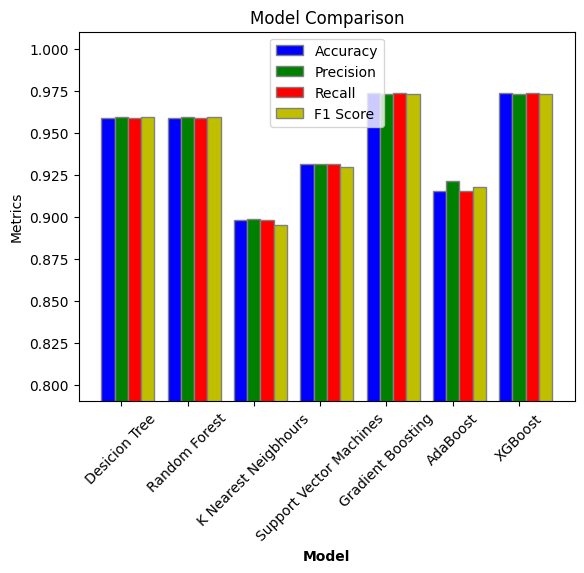

In [ ]:

# Number of models
n_models = len(Model_compare['Models'])

# Setting the positions and width for the bars
bar_width = 0.2
r1 = np.arange(n_models)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting the bars
plt.bar(r1, Model_compare['Accuracy'], color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, Model_compare['Precision'], color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, Model_compare['Recall'], color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, Model_compare['F1_score'], color = 'y', width=bar_width, edgecolor = 'grey', label = 'F1 Score')

# Adding the xticks
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(n_models)], Model_compare['Models'])

# Adding labels and title
plt.ylabel('Metrics')
plt.title('Model Comparison')
plt.legend()
plt.xticks(rotation=45)

# Set y-axis limits
plt.ylim(0.79, 1.01)

# Show the plot
plt.show()